<a href="https://colab.research.google.com/gist/KhawajaMuddassar/0fc17a1cd4fc0b1a5a9a41bbeafc30ae/basic-autoencoder-vanilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **What are Autoencoders?:**
Autoencoders are a type of neural network used for unsupervised learning, particularly in the field of deep learning. They are designed to learn efficient representations of data, typically for dimensionality reduction, feature learning, or generative modelling.

In previous topics related to object detection & segmentation learned about classifying images by training a model based on the input image and its corresponding label but now what if we need to cluster images based on their similarity and with the constraint of not having their corresponding labels, in this case auto encoder comes handy for identification and grouping images togather.

**How autoencoders works?:**
An autoencoder takes an image as input, stores it in a lower dimension, and tries to reproduce the same image as output. What makes an autoencoder different from the neural network architectures is that it first reduces the information in an image to a smaller, more compact form **(this is called encoding)**. Then, it tries to recreate the original image from this smaller representation **(this is called decoding)**. The **"encoder"** is responsible for compressing the image, while the **"decoder"** works on reconstructing it back to its original form.

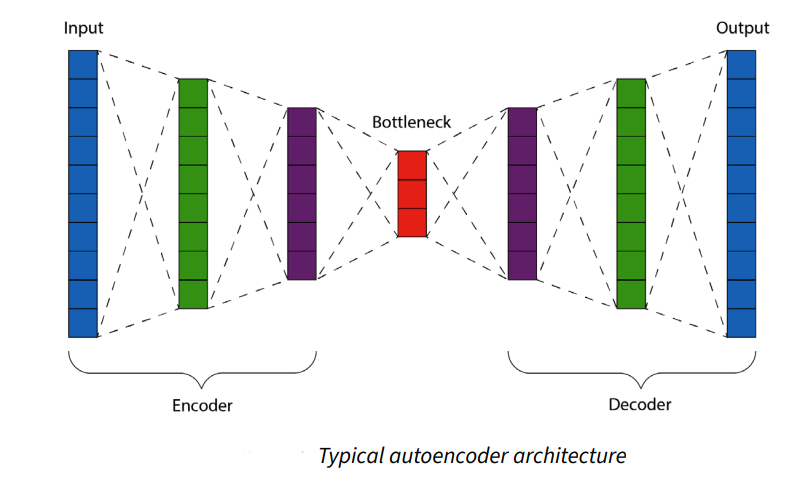

The layer in the middle is called the **bottleneck layer**, and it's where the image gets compressed into a smaller form. The parts of the network before the bottleneck layer are responsible for encoding the image, while the parts after it are responsible for decoding and reconstructing the image. The bottleneck layer allows us to represent the image in a much simpler, lower-dimensional form.We use the bottleneck layer to find similar images and even generate new ones.

# **Types of Autoencoders:**

* **Vanilla Autoencoder :** Vanilla Autoencoder is a simple yet powerful framework for unsupervised learning tasks.It comprises of two primary components: an encoder and a decoder.Together, these components function together compress input data into a lower-dimensional representation and then reconstruct it. some of major applicaitons of vanilla autoencoders are data compression, feature learning, anomaly detection.

* **Denoising Autoencoder :**Denoising Autoencoders emerge as a formidable solution for handling noisy input data. Unlike Denoising Autoencoders offer a powerful solution for handling noisy input data, enabling robust feature learning and data reconstruction in the presence of noise. By intentionally corrupting input data with noise and training the autoencoder to recover the clean underlying representation, Denoising Autoencoders effectively filter out noise and enhance the quality of reconstructed data. Their applications span diverse domains, from image and signal processing to data preprocessing.

* **Convolutional Autoencoder :**Convolutional Autoencoders represent a powerful variant of autoencoder models specifically designed for handling high-dimensional data with spatial structure, such as images. Unlike traditional autoencoders, convolutional autoencoders leverage convolutional layers to capture spatial dependencies and hierarchical features within the input data. This architecture enables them to efficiently encode and decode complex patterns, making them particularly well-suited for tasks such as image reconstruction, denoising, and feature extraction.

* **Variational Autoencoder :**Variational Autoencoders (VAEs) represent a groundbreaking advancement in the field of deep learning, seamlessly integrating probabilistic modeling and neural network architectures.VAEs introduce a probabilistic framework that enables them to not only reconstruct input data but also generate new data samples from a learned latent space. This dual capability of reconstruction and generation makes VAEs invaluable for tasks such as image generation, data synthesis, and representation learning.

# **Implementing Vanilla Autoencoders**

In [ ]:
!pip install -q torch_snippets
!pip install -q torch_summary
from torchsummary import summary
from torch_snippets import *
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch_snippets.torch_loader import DataLoader, Report
from torch.profiler import profile, record_function, ProfilerActivity
device = 'cuda' if torch.cuda.is_available() else 'cpu'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.7/218.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 53.8 MB/s eta 0:00:00


EPOCH: 1.000  val_loss: 0.144  trn_loss: 0.243  (28.27s - 113.09s remaining)
EPOCH: 2.000  val_loss: 0.101  trn_loss: 0.120  (56.69s - 85.03s remaining)
EPOCH: 3.000  val_loss: 0.082  trn_loss: 0.092  (88.22s - 58.81s remaining)
EPOCH: 4.000  val_loss: 0.073  trn_loss: 0.080  (117.03s - 29.26s remaining)
EPOCH: 5.000  val_loss: 0.066  trn_loss: 0.072  (145.74s - 0.00s remaining)


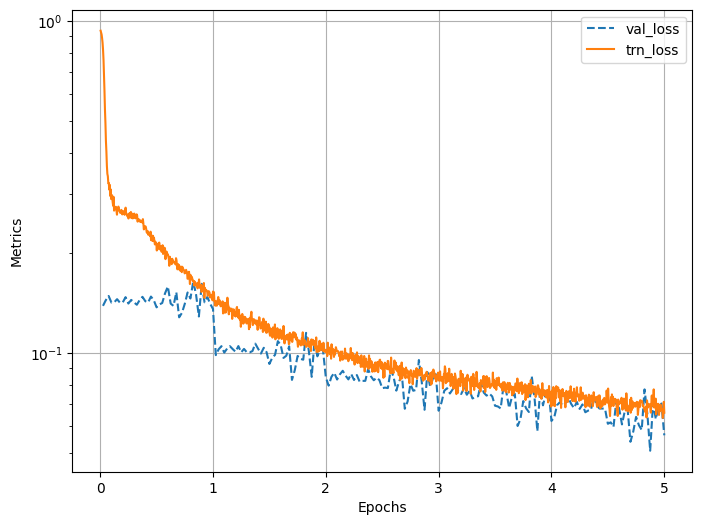

EPOCH: 1.000  val_loss: 0.207  trn_loss: 0.261  (28.54s - 114.15s remaining)
EPOCH: 2.000  val_loss: 0.189  trn_loss: 0.195  (57.63s - 86.45s remaining)
EPOCH: 3.000  val_loss: 0.180  trn_loss: 0.184  (86.04s - 57.36s remaining)
EPOCH: 4.000  val_loss: 0.176  trn_loss: 0.178  (114.82s - 28.70s remaining)
EPOCH: 5.000  val_loss: 0.173  trn_loss: 0.174  (143.61s - 0.00s remaining)


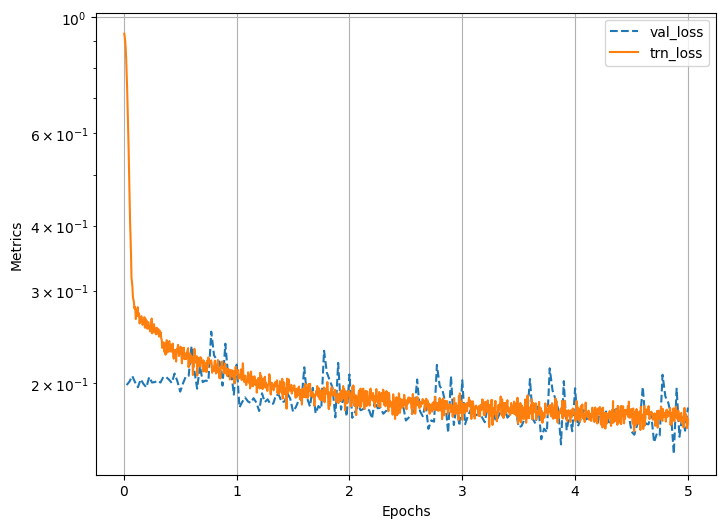

EPOCH: 1.000  val_loss: 0.196  trn_loss: 0.264  (29.56s - 118.25s remaining)
EPOCH: 2.000  val_loss: 0.168  trn_loss: 0.181  (58.09s - 87.13s remaining)
EPOCH: 3.000  val_loss: 0.158  trn_loss: 0.163  (86.16s - 57.44s remaining)
EPOCH: 4.000  val_loss: 0.153  trn_loss: 0.155  (114.53s - 28.63s remaining)
EPOCH: 5.000  val_loss: 0.150  trn_loss: 0.151  (144.11s - 0.00s remaining)


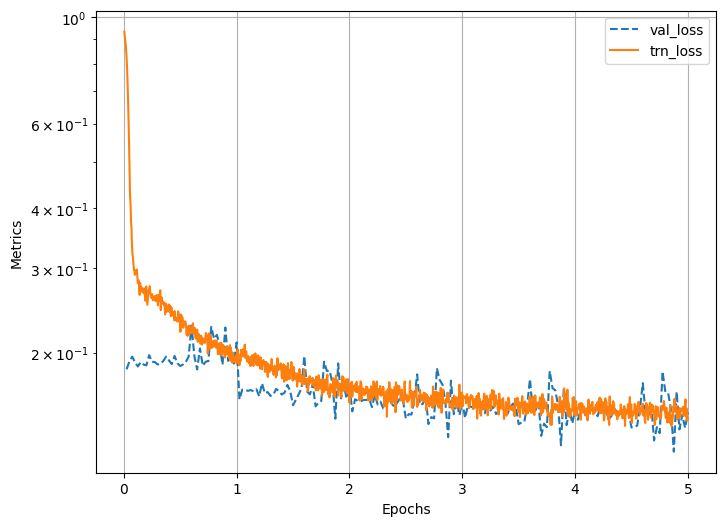

EPOCH: 1.000  val_loss: 0.163  trn_loss: 0.246  (28.96s - 115.86s remaining)
EPOCH: 2.000  val_loss: 0.140  trn_loss: 0.150  (57.95s - 86.92s remaining)
EPOCH: 3.000  val_loss: 0.128  trn_loss: 0.133  (87.29s - 58.20s remaining)
EPOCH: 4.000  val_loss: 0.122  trn_loss: 0.125  (117.62s - 29.41s remaining)
EPOCH: 5.000  val_loss: 0.119  trn_loss: 0.121  (147.16s - 0.00s remaining)


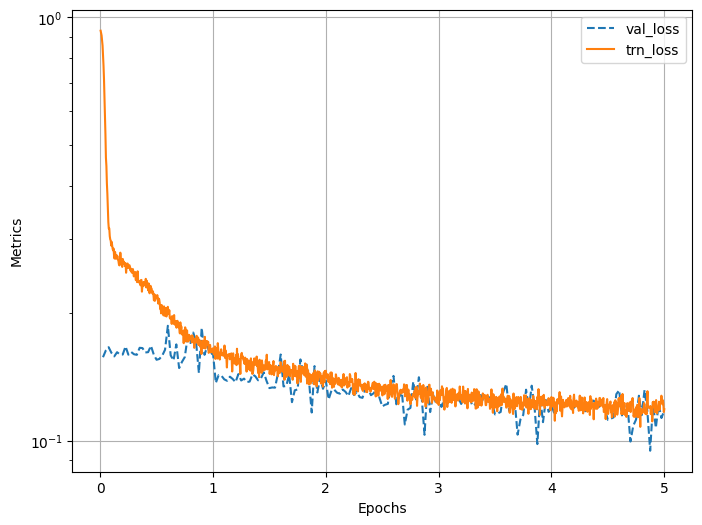

EPOCH: 1.000  val_loss: 0.163  trn_loss: 0.257  (28.80s - 115.20s remaining)
EPOCH: 2.000  val_loss: 0.118  trn_loss: 0.138  (58.30s - 87.45s remaining)
EPOCH: 3.000  val_loss: 0.106  trn_loss: 0.113  (87.19s - 58.13s remaining)
EPOCH: 4.000  val_loss: 0.098  trn_loss: 0.103  (116.41s - 29.10s remaining)
EPOCH: 5.000  val_loss: 0.093  trn_loss: 0.097  (145.62s - 0.00s remaining)


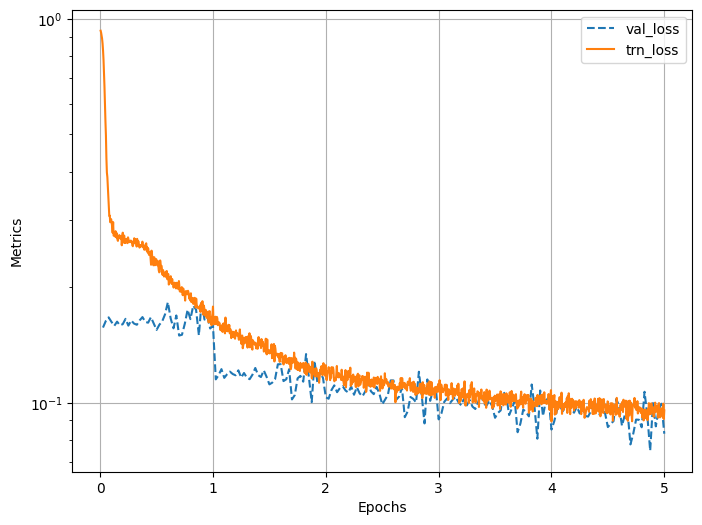

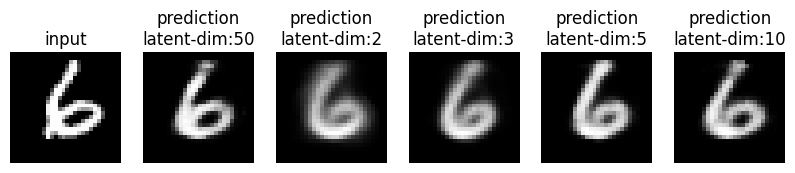

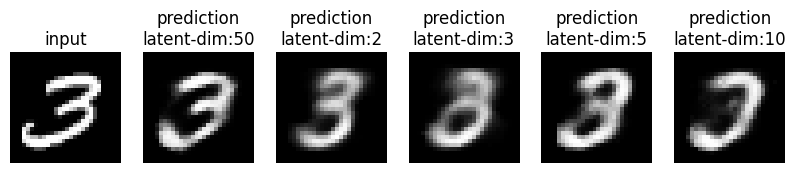

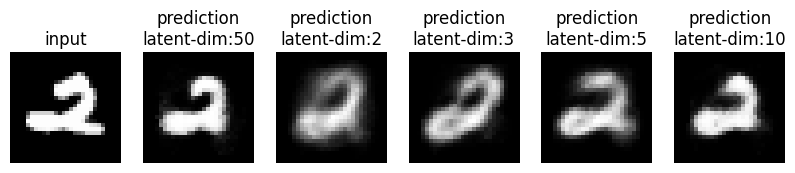

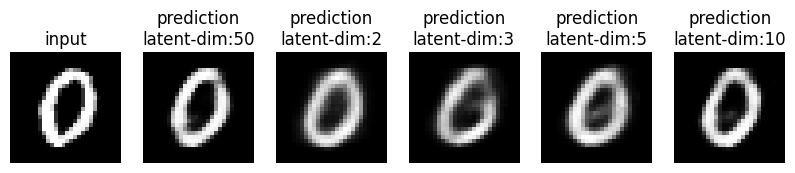

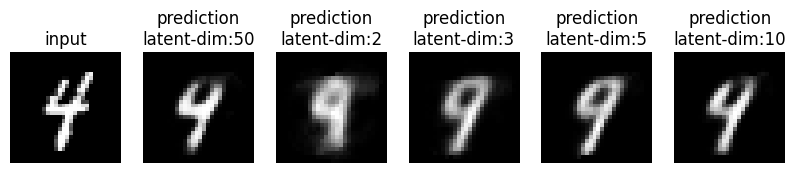

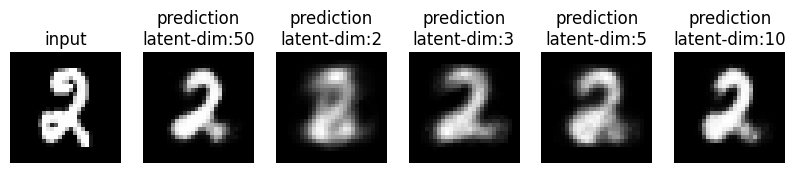

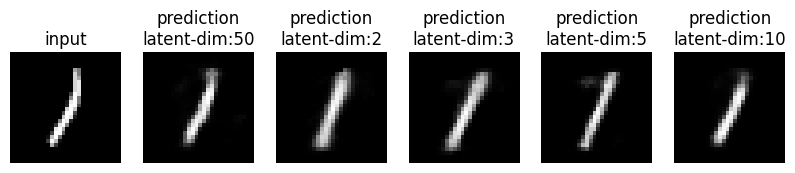

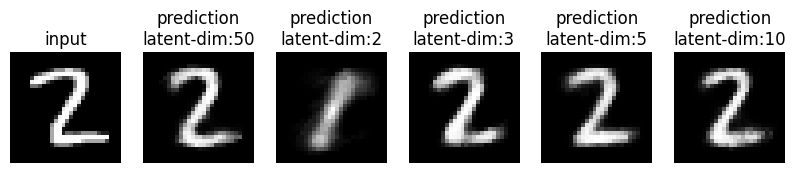

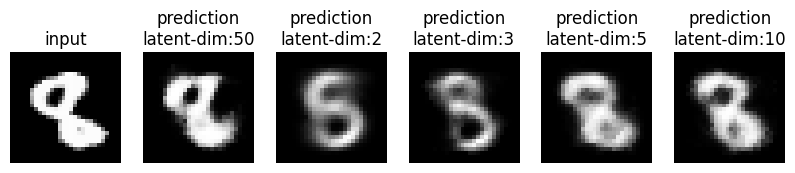

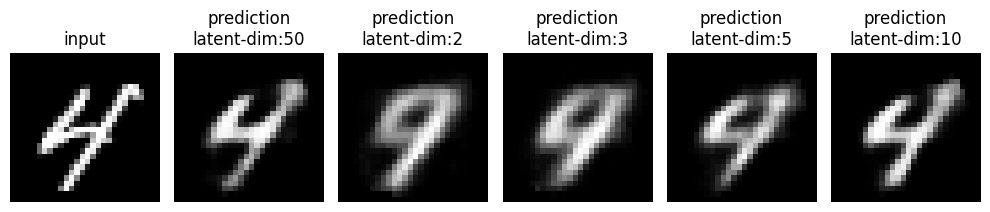

In [ ]:
class transformer:
    def __init__(self ,batch_size=256):
        self.batch_size = batch_size
    def __call__(self,img):
        img_transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize([0.5,], [0.5,]),
            transforms.Lambda(lambda x: x.to(device))
            ])
        return img_transform(img)

    def train_validate_ds(self):
        self.trn_ds = MNIST('/content/', transform=self, train = True, download=True)
        self.val_ds = MNIST('/content/', transform=self, train = False, download=True)
        return self.trn_ds, self.val_ds

    def dataloader(self):
        self.train_dl = DataLoader(self.trn_ds,batch_size=self.batch_size, shuffle=True)
        self.val_dl = DataLoader(self.val_ds, batch_size =self.batch_size, shuffle=False)
        return self.train_dl, self.val_dl

# Network Architecture
class AutoEncoder(nn.Module):
    def __init__(self,latent_dim):
        super().__init__()
        self.latent_dim = latent_dim
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28 , 128),
            nn.ReLU(True),
            nn.Linear(128,64),
            nn.ReLU(True),
            nn.Linear(64, self.latent_dim) )
        self.decoder = nn.Sequential(
            nn.Linear(self.latent_dim, 64),
            nn.ReLU(True),
            nn.Linear(64,128),
            nn.ReLU(True),
            nn.Linear(128,28 * 28),
            nn.Tanh() )
    def forward(self,x):
        x = x.view(len(x),-1)
        x = self.encoder(x)
        x = self.decoder(x)
        x = x.view(len(x), 1, 28, 28)
        return x

class train_model:
    def __init__(self, train_dl, val_dl,num_epochs=5):
        self.train_dl = train_dl
        self.val_dl = val_dl
        self.num_epochs = num_epochs
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'

    def train_batch(self, input):
        self.model.train()
        self.optimizer.zero_grad()
        output = self.model(input)
        loss = self.criterion(output, input)
        loss.backward()
        self.optimizer.step()
        return loss

    @torch.no_grad()
    def validate_batch(self,input):
        self.model.eval()
        output = self.model(input)
        loss = self.criterion(output, input)
        return loss

    def train_aec(self,latent_dim):
        self.model = AutoEncoder(latent_dim).to(device)
        self.criterion = nn.MSELoss()
        self.optimizer = torch.optim.AdamW(self.model.parameters(), lr=0.001, weight_decay=1e-5)
        num_epochs = 5
        log = Report(self.num_epochs)
        for epoch in range(num_epochs):
            N = len(self.train_dl)
            for ix, (data, _) in enumerate(self.train_dl):
                loss = self.train_batch(data)
                log.record(pos=(epoch + (ix+1)/N), trn_loss=loss, end='\r')
            N = len(val_dl)
            for ix, (data, _) in enumerate(self.val_dl):
                loss = self.validate_batch(data)
                log.record(pos=(epoch + (ix+1)/N), val_loss=loss, end='\r')
            log.report_avgs(epoch+1)
        log.plot(log=True)
        return self.model

    def outputs(self):
        #Plot outputs
        for _ in range(10):
            ix = np.random.randint(len(val_ds))
            im, _ = val_ds[ix]
            fig, ax = plt.subplots(1, len(aecs)+1, figsize=(10,4))
            ax = iter(ax.flat)
            show(im[0], ax=next(ax), title='input')
            for model in aecs:
                _im = model(im[None])[0]
                show(_im[0], ax=next(ax), title=f'prediction\nlatent-dim:{model.latent_dim}')
        plt.tight_layout()
        plt.show()

if __name__ == '__main__':
    # Download and prepare
    prepare_data = transformer()

    # datset
    train_ds,val_ds = prepare_data.train_validate_ds()

    # Train and Validate Loaders
    train_dl, val_dl = prepare_data.dataloader()

    #Initialize Training
    trainer = train_model(train_dl,val_dl)

    #Training over increasing epochs and plots
    aecs = [trainer.train_aec(latent_dim) for latent_dim in [50, 2, 3, 5, 10]]

    #Plot Outputs
    trainer.outputs()

**Prediction:** It is clear that as the number of vectors in the bottleneck layer / Latent-Dim increased, the clarity of the reconstructed image improved